<a href="https://colab.research.google.com/github/MafikengZ/Unsupervised-Learning-Recommender-Systems/blob/main/engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation System
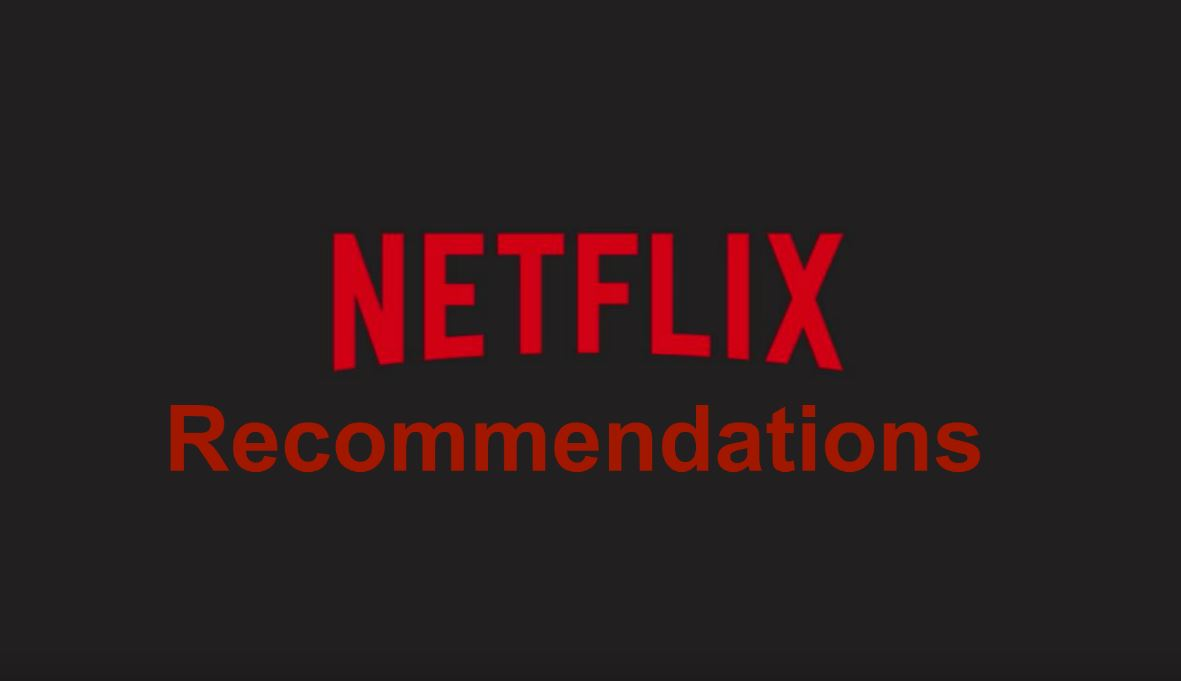

Recommendation engines is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item.such systems have the capability to predict future preferences of items that a person would probably like to have. It works by finding similarities between two items

Broadly, recommender systems can be classified into 3 types:

- **Simple recommenders**:offer generalized recommendations to every user, based on movie popularity and/or genre. The basic ideabehind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience. An example could be IMDB Top 250.

- **Content-based recommenders:** suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person likes a particular item, he or she will also like an item that is similar to it. And to recommend that, it will make use of the user's past item metadata. A good example could be YouTube, where based on your history, it suggests you new videos that you could potentially watch.

- **Collaborative filtering engines:** these systems are widely used, and they try to predict the rating or preference that a user would give an item-based on past ratings and preferences of other users. Collaborative filters do not require item metadata like its content-based counterparts.


***Sources:*** 
*https://github.com/ngezler/Implementation-of-Movie-Recommender-System/blob/master/SY_1_Unsupervised_Notebook.ipynb*

*https://www.kaggle.com/najeedosmani/movie-recommender-system-with-eda*

### Benefits of using Recommender Systems

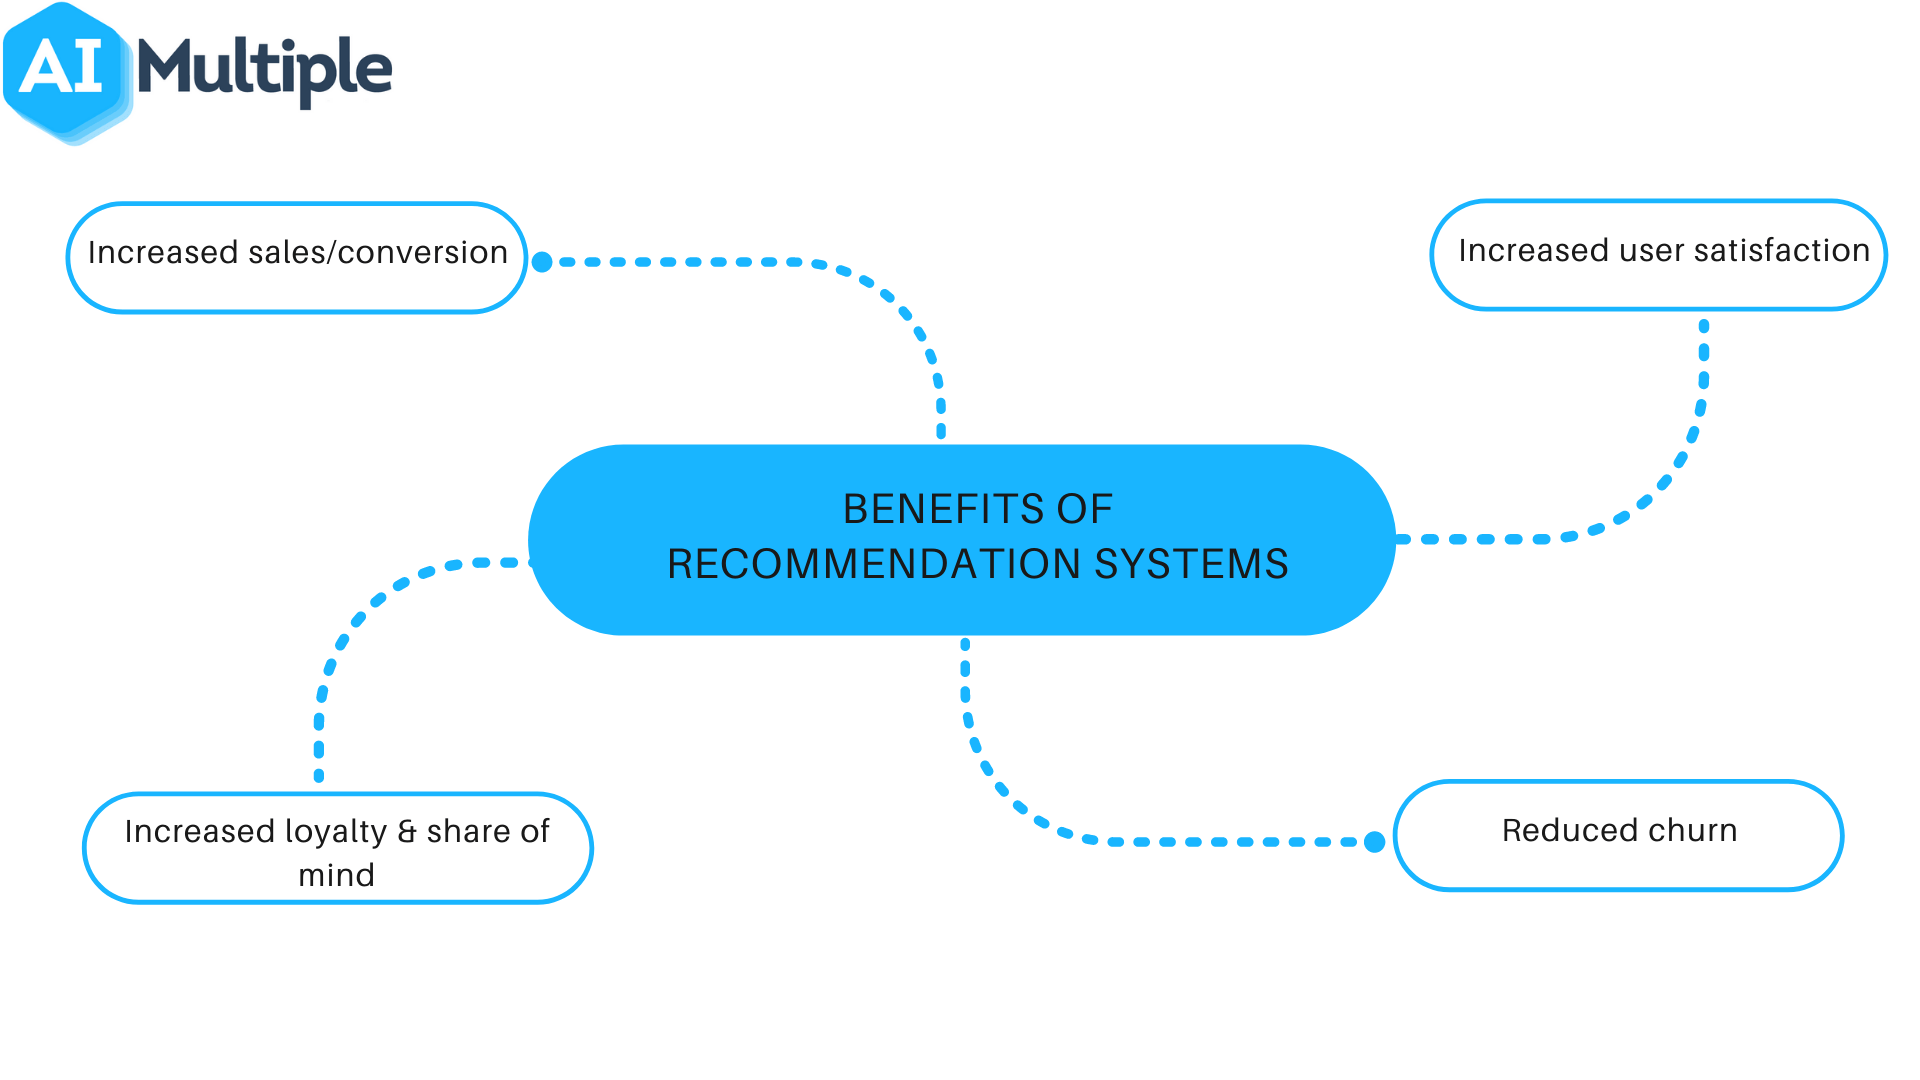

 Organisaztion utilize Recommendation engines to improve their personalised user experience and customer satisfaction and while driving the economic benefits through increased revenue.

## Commet Configurations

In [ ]:
!pip install comet_ml

     |████████████████████████████████| 315 kB 5.1 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 418 kB 60.7 MB/s 
  Created wheel for dulwich: filename=dulwich-0.20.31-cp37-cp37m-linux_x86_64.whl size=529923 sha256=16eca4cc465eddfa06d0c6e8904f2c83a720c8da7e43666c8b8d6a3ed56fad91
  Stored in directory: /root/.cache/pip/wheels/2a/91/4b/baf2db7868260b018efce675f252fc0ae4c09b28c652df9736
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34547 sha256=4c186db73addc75d67eaf02950114bbecaf53804900302180400394146814be7
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built dulwich configobj


In [51]:
# import comet_ml
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="HfSNpkY9koDD8GCccjV6a7o3K",
    project_name="recommendation-system",
    workspace="mafikengz",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mafikengz/recommendation-system/919dd2e03ae248bc8694e57d1a1ba1e3



## Import Libraries

In [1]:
#Scientific libraries
import numpy as np 
import pandas as pd 

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#Configurations
import warnings
warnings.filterwarnings("ignore")

# sns.set(style='whitegrid', palette='muted',
#         rc={'figure.figsize': (12,8)})

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

## Load Dataset

In [ ]:
#Linux commands & upload file into colab
!pip install kaggle -q

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
yamqwe/omicron-covid19-variant-daily-cases                  Omicron daily cases by country (COVID-19 variant)  432KB  2022-01-23 07:14:43           7046  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                         3GB  2022-01-10 06:29:59            435  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09            646  
yasserh/song-popularity-dataset                             Song Popularity Dataset                            805KB  2022-01-07 13:18:43           1008  
vishalmane10/anime-dataset-2022     

In [ ]:
#Download dataset
! kaggle competitions download -c 'edsa-movie-recommendation-wilderness'

movies.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
genome_tags.csv: Skipping, found more recently modified local copy (use --force to force download)
links.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
tags.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
imdb_data.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
genome_scores.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Unzip datasets
! mkdir datasets
!unzip movies.csv.zip -d datasets
!unzip train.csv.zip -d datasets
!unzip test.csv.zip -d datasets
!unzip tags.csv.zip -d datasets
!unzip links.csv.zip -d datasets
!unzip imdb_data.csv.zip -d datasets
!unzip genome_scores.csv.zip -d datasets
!unzip sample_submission.csv.zip -d datasets

mkdir: cannot create directory ‘datasets’: File exists
Archive:  movies.csv.zip
replace datasets/movies.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/movies.csv     
Archive:  train.csv.zip
replace datasets/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/train.csv      
Archive:  test.csv.zip
replace datasets/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/test.csv       
Archive:  tags.csv.zip
replace datasets/tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/tags.csv       
Archive:  links.csv.zip
replace datasets/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/links.csv      
Archive:  imdb_data.csv.zip
replace datasets/imdb_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/imdb_data.csv  
Archive:  genome_scores.csv.zip
replace datasets/genome_scores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/genome_scores.csv  
Archive: 

In [3]:
# import dataset
train = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
tags = pd.read_csv('datasets/tags.csv')
movies = pd.read_csv('datasets/movies.csv')
links = pd.read_csv('datasets/links.csv')
imdb_data = pd.read_csv('datasets/imdb_data.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_score = pd.read_csv('datasets/genome_scores.csv')
sample_submission = pd.read_csv('datasets/sample_submission.csv')

In [38]:
train.head()

AttributeError: ignored

In [ ]:
movies.head()

## Data Preprocessing

In [ ]:
print(f'movies shape: {movies.shape} , train shape: {train.shape}')

In [ ]:
print(f'Unique Rating: {train.rating.unique()}')

In [4]:
#Merge movies and train tables
data = pd.merge(train , movies, on = 'movieId')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [5]:
from datetime import datetime

# Convert timestamp to year column representing the year the rating was made on merged dataframe
data['rating_year'] = data['timestamp'].apply(lambda timestamp: datetime.fromtimestamp(timestamp).year)
data.drop('timestamp', axis=1, inplace=True)

In [ ]:
data.iloc[0]

In [ ]:
data.head()

In [ ]:
# Find the number of times a user has rated, create a dataframe with the count by userId
train_user = pd.DataFrame(
    data['userId'].value_counts()).reset_index()
train_user.rename(columns={'index':'userId','userId':'count'},
                  inplace=True)
train_user.head()

### Grouping Users within specific range of userId count

In [ ]:
# Grouping the users within a certain range => determine the common userId's and the new ones.
group_one = train_user.loc[(train_user['count'] > 0) & 
            (train_user['count'] < 50),
            'userId'].value_counts().sum()
group_two = train_user.loc[(train_user['count'] >= 50) & 
            (train_user['count'] < 500),
            'userId'].value_counts().sum()
group_three = train_user.loc[(train_user['count'] >= 500) & 
            (train_user['count'] < 1000),
            'userId'].value_counts().sum()
group_four = train_user.loc[(train_user['count'] >= 1000) & 
            (train_user['count'] < 1500),
            'userId'].value_counts().sum()
group_five = train_user.loc[(train_user['count'] >= 1500),
            'userId'].value_counts().sum()

In [ ]:
import plotly.graph_objects as go

labels = ['first_group','second_group','third_group','forth_group' , 'fith_group']
values = [group_one, group_two, group_three, group_four , group_five]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [ ]:
import plotly.express as px
# Visualize the insight in the spread, we used figures to determine the spread.
trial_error = np.array([['first_group', group_one,
                         'ratings_count between 1 and 50'],
                        ['Second_group', group_two,
                         'ratings_count between 50 and 500'],
                        ['Third_group', group_three,
                         'ratings_count between 500 and 1000'],
                        ['fourth_group', group_four,
                         'ratings_count between 1000 and 1500'],
                        ['fifth_group', group_five,
                         'ratings_count greater than 1500']])
trial_error_df = pd.DataFrame({'group': trial_error[:, 0],
                               'userId_grouping': trial_error[:, 1],
                               'explanation': trial_error[:, 2]})
fig = px.bar(trial_error_df,
             x=trial_error_df["group"],
             y=trial_error_df["userId_grouping"],
             color=trial_error_df["group"],
             title='Grouped Rating Distribustion')
fig.show()
trial_error_df

**Note:** Majority of the ratings have been done by relatively new users or users who have inconsistent rating behavior. Based on this information we need to further find alternative ways of obtaining similarities between users by looking into the ratings per movie

In [ ]:
# Count the number of times a specific rating has been assigned.
train_rating = pd.DataFrame(
    data['rating'].value_counts()).reset_index()
train_rating.rename(
    columns={'index': 'rating', 'rating': 'count'}, inplace=True)
train_rating.head(10)

In [ ]:
#Visualize the Distribution of Ratings
fig = px.bar(train_rating, x=train_rating['rating'],
             y=train_rating['count'],
             color=train_rating['rating'],
             title='Distribustion by Rating')
fig.show()

**Note:** Rating 4.0 and 3.0 have high frequency: Meaning most movies has a rating of 4.0 with a count of 2.652977M. Which clearly indicates to us that the users in the dataset will opt for giving movies a rating of 4.0

Understanding the distribution of ratings is key to finding common traits between users.

### Analysing the Dataset

In [ ]:
#Create a dataframe that outlines size of datasets
dataframes = ['train', 'test', 'tags', 'imdb_data',
              'links', 'movies', 'genome_tags', 'genome_score']

length = [len(train), len(test), len(tags),
         len(imdb_data), len(links), len(movies),
         len(genome_tags), len(genome_score)]

total_length = pd.DataFrame(list(zip(dataframes, length)),
                             columns=['dataframe', 'length'])
total_length

In [ ]:
new_row = {'dataframe': 'other', 'length': 180530}
total_length = total_length.append(new_row,
                                     ignore_index=True)
total_length

In [ ]:
# By refining the data frame we were able to see the distribution of the overall data.
total_length = total_length[total_length['length'] > 100000]
total_length

In [ ]:
import plotly.graph_objects as go

labels = total_length['dataframe'].values
values = total_length['length'].values
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [ ]:
# Obtaining total null values in each Data Frames columns
train_count = pd.DataFrame(train.isnull().sum())
test_count = pd.DataFrame(test.isnull().sum())
tags_count = pd.DataFrame(tags.isnull().sum())
movies_count = pd.DataFrame(movies.isnull().sum())
links_count = pd.DataFrame(links.isnull().sum())
imdb_count = pd.DataFrame(imdb_data.isnull().sum())
genomet_count = pd.DataFrame(genome_tags.isnull().sum())
genomes_count = pd.DataFrame(genome_score.isnull().sum())

In [ ]:
plt.bar(tags_count.index,
        tags_count.values.reshape(len(tags_count), ),
        color='purple')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Count null values in tags')
plt.show()

In [ ]:
plt.bar(links_count.index,
        links_count.values.reshape(len(links_count), ),
        color='orange')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Count null values in links')
plt.show()

In [ ]:
plt.bar(imdb_count.index,
        imdb_count.values.reshape(len(imdb_count), ),
        color='red')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Count null values in imdb_data')
plt.show()

**Note:** Removing the null values produce a more refined data depending on the amount of null values present. The imdb_dataset had a large amount of null values and dropping these rows would reduce the size of the dataset.

### Visualize the Correlation in dataset

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it actually refers to the degree to which a pair of variables are linearly related.

**Source:** https://en.wikipedia.org/wiki/Correlation

In [ ]:
# Correlation between the train_df and tags_df
corr_tag_train = pd.concat([train, tags], axis=1).corr()
corr_tag_train.head()

In [ ]:
sns.heatmap(corr_tag_train, vmin=0,vmax=5,center=1,cmap="RdBu_r")

In [ ]:
# Finding values in the UserID columns of the tags and train dataframe.
common_userid = pd.DataFrame(train['userId'].isin(tags['userId']).
                         value_counts())
plt.bar(['Not Present', 'Present'],
        common_userid.values.reshape(len(common_userid), ),
        color='green')
plt.xlabel('Observations')
plt.ylabel('Count_in_millions')
plt.title('common userid between the train and tags')
plt.show()

In [ ]:
# Finding values in the MovieID columns of the tags and train data frame.
common_movieid = pd.DataFrame(train['movieId'].isin(tags['movieId']).
                          value_counts())
plt.bar(['Not Present', 'Present'],
        common_movieid.values.reshape(len(common_movieid), ),
        color='green')
plt.xlabel('Observations')
plt.ylabel('Count_in_millions')
plt.title('common_attributes between the train and tags')
plt.show()

In [ ]:
# Finding values in the Timestamp columns of the tags and train.
common_timestamp = pd.DataFrame(train['timestamp'].isin(tags['timestamp']).
                         value_counts())
plt.bar(['Not Present', 'Present'],
        common_timestamp.values.reshape(len(common_timestamp), ),
        color='orange')
plt.xlabel('Observations')
plt.ylabel('Count_in_millions')
plt.title('common_attributes between the train and tags')
plt.show()

In [ ]:
# Finding values in the MovieID columns of the links and movies data frame.
common_movieid2 = pd.DataFrame(movies['movieId'].isin(links['movieId']).
                          value_counts())
plt.bar(['Present'],
        common_movieid2.values.reshape(len(common_movieid2), ),
        color='red')
plt.xlabel('Observations')
plt.ylabel('Count_millions')
plt.title('common_attributes between the movies and links')
plt.show()

Checked for common attributes between different data frames. These attributes assist us in extending our understanding of the similarities between ratings based on: Movie Genres, Directors, Movie Budgets, Movie Titles, etc.

Based on the information provided, we able to deduce the following:

- Although the train and the tags have similiar users ID's, majority of the users are new or inconsistent raters.
- The common attributes are minimal between the train and tags.
- Although there are a few users with similiar ID's, these users have no common attributes interms of the movies watched or the length of the movies.
- The table with the most common links are the movie and the links which have common attributes in the movie ID's column.

In [ ]:
#Average ratings related to a specific title.
data.groupby(by='title')['rating'].mean().head(10)

In [ ]:
#Highest average ratings related to a specific title.
data.groupby(by='title')['rating'].mean().sort_values(ascending=False).head(50)

**Note:** There are couple of movies with the highest ratings, which are worth watching

In [ ]:
#Count Number of people actually gave ratings to a specific movie.
data.groupby(by='title')['rating'].count().sort_values(ascending=False)


*Love on the Dole (1941)* has the Lowest Average rating, not even 5 viewers rated this movie, which cannot be recommended to watch!

In [ ]:
#Create a table showcasing Average rating per title and the count
avg_rating_by_title = pd.DataFrame(data.groupby(by='title')['rating'].mean())
avg_rating_by_title['rating_count']= data.groupby(by='title')['rating'].count().sort_values(ascending=False) #Number of people who rated!
avg_rating_by_title.head()

In [ ]:
#Create a table showcasing Average rating per userId and the count
ratings_mean_count = pd.DataFrame(data.groupby('userId')['rating'].
                                  mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(data.
                                                   groupby('movieId')
                                                   ['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
userId,,
1,3.910714,23062.0
2,3.416667,9654.0
3,3.691235,4727.0
4,3.308989,968.0
5,3.885714,4648.0


In [ ]:
#Create a table showcasing Average rating per movieId and the count
ratings_mean_count = pd.DataFrame(data.groupby('movieId')['rating'].
                                  mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(data.
                                                   groupby('movieId')
                                                   ['rating'].count())
ratings_mean_count.head(20)

,rating,rating_counts
movieId,,
1,3.889971,23062
2,3.263414,9654
3,3.132325,4727
4,2.878099,968
5,3.059165,4648
6,3.857906,9828
7,3.381459,4838
8,3.052209,498
9,3.010533,1519


In [ ]:
#Visualize the relationships between the Average Ratings and the number of people who rated a movie.
sns.jointplot(x=avg_rating_by_title['rating'], 
              y=avg_rating_by_title['rating_count'], 
              alpha=0.4)

**Note:** Movies with ratings in the range of 3 to 4.5 has the most number of ratings. The average rating is based on the titles of the movies. For instance, Selling Isobel (2018) received an averaging of 5 stars, these averages could be misleading. Users could have rated the movies once and this could have increased the average rating. 

Shawshank Redemption, The (1994) had a total of 32831 ratings but due to the imabalance between user and ratings, the average ratings dropped. The inconsistency in the data could essentially lead to a biased model due to these observations. Grouping the ratings by the genre and finding the links between title of the movie and the average rating aided us in determining the variables which play a role in predicting the rating.

## Exploratory Data Analysis(EDA)

In [ ]:
import chart_studio.plotly as cs
import plotly.figure_factory as ff

#Visualize the Density Plot
import plotly.express as px
df = avg_rating_by_title

fig = px.density_contour(df, x="rating", y="rating_count")
fig.show()

**Note:** We can see the dark black zone in the plot which represent most no. of datapoints almost have 2 to 4 star ratings. Dark regions generally represent the Dense zones, which simply means alot of datapoints at that region

In [ ]:
#Visualize the ratings distribution
plt.figure(figsize=(12,8))
sns.distplot(avg_rating_by_title['rating'])
plt.title('Ratings Distribution')
plt.ylabel('Counts')

**Note:** The graph has Normal distribution with some negative skew.

We have enough knowledge about the trends that the data is showcasing confidence to actually create a Recommender system that suggests similar kind of movies.

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data, x="rating_year", y="rating" , marker=True)
plt.title('Ratings Year Distribution')

### Generate wordCloud

Many times you might have seen a cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word.

**Source:** https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
tags.head()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

words = ''

for x in tags['tag']:

    # typecaste each val to string
    x = str(x)

    # split the value
    tokens = x.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    words += " ".join(tokens)+" "

In [ ]:
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Distribution of words in the tags data frame by Tags')
plt.tight_layout(pad=0)

plt.show()

In [ ]:
value_count = pd.DataFrame(tags['tag'].
                           value_counts()).reset_index()
value_count.rename(columns = {'index': 'genre', 'tag': 'count'},
                   inplace = True)
value_count.head()

In [ ]:
words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in genome_tags['tag']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate(words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Common words within the genome_tags, tags column')
plt.tight_layout(pad=0)

plt.show()

In [ ]:
common_users = train.groupby(by = 'userId')
common_users.get_group(1)

In [ ]:
train_com_user.head()

### Analyzing the Release Year

In [ ]:
dates = []
for title in data['title']:
    if title[-1] == " ":
        year = title[-6: -2]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)
    else:
        year = title[-5: -1]
        try:
            dates.append(int(year))
        except:
            dates.append(9999)

data['release year'] = dates
data['release year'].unique()

In [ ]:
data[data['release year'] == 9999].head()

In [ ]:
data[(data['release year'] > 1888) &
          (data['release year'] < 2021)]

In [ ]:
dataset = pd.DataFrame(data['release year'].
                       value_counts()).reset_index()
dataset.rename(columns={'index': 'year', 'release year': 'count'},
               inplace=True)
dataset.head(50)

In [ ]:
# Plotting the release years
plt.figure(figsize=(12,8))
sns.lineplot(data=dataset, x="year", y="count" , marker=True)
plt.title('Ratings Year Distribution')

### Analyzing Movie Genre

In [ ]:
genres = pd.DataFrame(data['genres'].
                      str.split("|").
                      tolist(),
                      index=data['movieId']).stack()
genres = genres.reset_index([0, 'movieId'])
genres.columns = ['movieId', 'Genre']
genres.head()

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Genre',
              data=genres,
              palette='CMRmap',
              order=genres['Genre'].
              value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

According to a study published by Amy Waston (Favorite film genres in the U.S. 2018, by gender) suggests that the top two genres liked by both men and women are Comedys and Dramas. From above results we can see that Drama and Comedy are the movie genre that the viewers would most likely would watch.

**Source:** https://www.statista.com/statistics/254115/favorite-movie-genres-in-the-us/

### Analysing Movie Budget

In [ ]:
imdb_data.head()

In [ ]:
imdb_data['runtime'] = imdb_data['runtime'].fillna(imdb_data['runtime'].mean())
imdb_data.isnull().sum()

In [ ]:
imdb_data.head()

In [ ]:
imdb_data['budget'] = imdb_data['budget'].str.replace('[\,]', '', regex=True)

In [ ]:
import re
def clean_txt(text):
    text = re.sub(r'[0-9]+', "", str(text))
    return text

imdb_data['currency'] = imdb_data['budget'].apply(clean_txt)
imdb_data.head()

In [ ]:
currencies = list(imdb_data['currency'])
# Number of currencies
len(set(currencies))-1

In [ ]:
currencies_count_df = pd.DataFrame(imdb_data['currency'].
                                   value_counts()).reset_index()
currencies_count_df.rename(columns={'index': 'currency', 'currency': 'count'},
                           inplace=True)
currencies_count_df.head()

In [ ]:
fig = px.bar(currencies_count_df, x=currencies_count_df['currency'],
             y=currencies_count_df['count'],
             color=currencies_count_df['currency'],
             title='Currency Type Distribution')
fig.show()

More than 71% of the data in the budget column are null values. The budget column contains different currencies with the US Dollar holding the majority. The exchange rates change gradually over time, with time value of money, money loses value over time so comparing or changing to one currency will not be ideal.

# Build Recommendation Model

### Collaborative Filtering Technique

The collaborative filtering approach builds models based on user’s past behaviors as well as similar decisions made by other users. This model is used to predict items (or ratings for items) that the user may have an interest in. Within collaborative filtering, there are two well-known distinct approaches:

- Memory-Based: models calculate the similarities between users / items based on user-item rating pairs.
- Model-Based: models use some sort of machine learning algorithm to estimate the ratings.

#### Singular Value Decomposition (SVD)

**Mathematics:** In linear algebra, the Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices. It has some interesting algebraic properties and conveys important geometrical and theoretical insights about linear transformations. It also has some important applications in data science.

To understand SVD we need to first understand the Eigenvalue Decomposition of a matrix. We can think of a matrix A as a transformation that acts on a vector x by multiplication to produce a new vector Ax. We use [A]ij or aij to denote the element of matrix A at row i and column j. If A is an m×p matrix and B is a p×n matrix, the matrix product C=AB (which is an m×n matrix) is defined as:


In the SVD model, an estimated rating of user u on item i is calculated as:
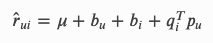

- where μ is the overall average rating, and every other parameter is calculated from the model with a gradient descent method.
- The model will then try to fit this estimated rating on all the known ratings, minimise the MSE (mean squared error), and return the closest fit.
- bᵤ and bᵢ are scalars, they represent the biases of the user u or item i.
- pᵤ and qᵢ are vectors,.they are the actual matrix-factorisation part of the model.

In [4]:
#Preparing the dataset
train_set = train.drop(['timestamp'], axis=1)
train_set = train_set.reset_index(drop=True)

print(train_set.shape)
train_set.head()

(10000038, 3)


,userId,movieId,rating
0,5163,57669,4.0
1,106343,5,4.5
2,146790,5459,5.0
3,106362,32296,2.0
4,9041,366,3.0


In [5]:
! pip install scikit-surprise

In [6]:
from surprise import Reader
from surprise import Dataset

In [7]:
#Load Dataset
reader = Reader(rating_scale=(0.0, 5.0))
df = Dataset.load_from_df(train_set[['userId', 'movieId', 'rating']], reader)
df

In [8]:
from surprise.model_selection import train_test_split

In [9]:
trainset, testset = train_test_split(df, test_size=0.10)

In [10]:
from surprise import SVD
from surprise import accuracy 

In [ ]:
# Modelling => Contains default parameters
algo_svd = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02)
algo_svd.fit(trainset)

predictions = algo_svd.test(testset)
rmse_svd = accuracy.rmse(predictions)
print('RMSE: ', rmse_svd)

### Cosine Similarity

Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space.

In [ ]:
# Create Data Frame based on the grouping of elements by userID
avg_userid = train.groupby(by="userId", as_index=False)['rating'].mean()
rating_avg = pd.merge(train, avg_userid, on='userId')
# Calcualte difference of the Mean ratings
rating_avg['avg_rating'] = rating_avg['rating_x'] - rating_avg['rating_y']
rating_avg.head()

,userId,movieId,rating_x,timestamp,rating_y,avg_rating
0,5163,57669,4.0,1518349992,4.136364,-0.136364
1,5163,68157,5.0,1434310125,4.136364,0.863636
2,5163,1247,4.5,1434310106,4.136364,0.363636
3,5163,441,4.0,1518292657,4.136364,-0.136364
4,5163,2671,1.0,1545511636,4.136364,-3.136364


In [ ]:
avg_movieid = pd.DataFrame(rating_avg['movieId'].
                             value_counts()).reset_index()
avg_movieid.rename(columns={'index': 'movieId', 'movieId': 'count'},
                     inplace=True)
avg_movieid

,movieId,count
0,318,32831
1,356,32383
2,296,31697
3,593,29444
4,2571,29014
...,...,...
48208,168686,1
48209,198641,1
48210,141269,1
48211,133073,1


In [ ]:
# Merge Dataframes to increase information
rating_avg = pd.merge(avg_movieid, rating_avg, on='movieId')
rating_avg.head()

,movieId,count,userId,rating_x,timestamp,rating_y,avg_rating
0,318,32831,106362,4.5,1303329140,3.371012,1.128988
1,318,32831,144018,4.0,1109921309,3.486301,0.513699
2,318,32831,80119,5.0,1254575871,2.707547,2.292453
3,318,32831,6063,4.0,1126444252,3.044807,0.955193
4,318,32831,109194,5.0,1547837993,4.057377,0.942623


In [ ]:
# To preserve disk memory, only include ratings above 1000 per user.
rating_avg = rating_avg[rating_avg['count'] > 1000]
rating_avg.head()

,movieId,count,userId,rating_x,timestamp,rating_y,avg_rating
0,318,32831,106362,4.5,1303329140,3.371012,1.128988
1,318,32831,144018,4.0,1109921309,3.486301,0.513699
2,318,32831,80119,5.0,1254575871,2.707547,2.292453
3,318,32831,6063,4.0,1126444252,3.044807,0.955193
4,318,32831,109194,5.0,1547837993,4.057377,0.942623


In [ ]:
rating_avg.groupby('movieId')['avg_rating'].count().sort_values(ascending=False).head()

movieId
318     32831
356     32383
296     31697
593     29444
2571    29014
Name: avg_rating, dtype: int64

In [ ]:
data[data['movieId']== 318]['title'].head(1)

282777    Shawshank Redemption, The (1994)
Name: title, dtype: object

**Note:** The distributrion of movie ID's by rating also contained movies with single ratings or ratings that could be seen as negligable. We decided to obtain the top 20 movie ID's and see how they are distributed. 

Based on the graphs, we noticed movie ID 318 ***(Shawshank Redemption, The (1994))*** had the most ratings and this aided in using a base movie to obtain similarities amoung users when using the cosine similarity method.

#### Model

In [ ]:
rating_avg.head()

In [ ]:
pvt_table = rating_avg.pivot_table(values='rating_x', 
                           index='userId', columns='movieId')

pvt_table.head()

movieId,1,2,3,5,6,7,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,31,32,34,36,39,41,44,45,46,47,48,50,52,58,60,...,135133,135143,135536,135569,136020,136864,138036,139385,139644,140110,140174,142488,143355,143385,148626,152077,152081,157296,158238,159093,163645,164179,164909,166461,166528,166534,166635,166643,168248,168250,168252,171763,174055,176371,177593,177765,179819,187541,187593,195159
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,3.5,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.5,NaN,NaN,NaN,NaN,4.0,NaN,3.5,NaN,NaN,NaN,NaN,3.5,NaN,4.5,NaN,NaN,NaN,NaN,4.5,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,2.5,NaN,3.5,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Obtain the best rated movie.
best_ratings = pvt_table.iloc[317]
best_ratings.head()

movieId
1    3.5
2    NaN
3    NaN
5    NaN
6    3.5
Name: 318, dtype: float64

In [ ]:
#correlation of movie ratings based on the best rated movie.
movies_like_318 = pvt_table.corrwith(best_ratings)
corr_shawshank = pd.DataFrame(movies_like_318,
                              columns=['correlation'])
corr_shawshank.dropna(inplace=True)
corr_shawshank.head()

,correlation
movieId,
1,0.018041
2,0.635085
3,0.269430
5,0.500000
6,0.615547


In [ ]:
corr_shawshank.sort_values('correlation', ascending=False).head(10)

,correlation
movieId,
195159,1.0
8783,1.0
4848,1.0
5254,1.0
5620,1.0
1288,1.0
1269,1.0
5903,1.0
1237,1.0


In [ ]:
data[data['movieId']== 8783]['title'].head(1)

7820964    Village, The (2004)
Name: title, dtype: object

In [ ]:
ratings_mean_count.head()

,rating,rating_counts
movieId,,
1,3.889971,23062
2,3.263414,9654
3,3.132325,4727
4,2.878099,968
5,3.059165,4648


In [ ]:
corr_shawshank = corr_shawshank.join(ratings_mean_count['rating_counts'] , on ='movieId')
corr_shawshank.head()

,correlation,rating_counts
movieId,,
1,0.018041,23062
2,0.635085,9654
3,0.269430,4727
5,0.500000,4648
6,0.615547,9828


In [ ]:
corr_shawshank.reset_index()

,movieId,correlation,rating_counts
0,1,0.018041,23062
1,2,0.635085,9654
2,3,0.269430,4727
3,5,0.500000,4648
4,6,0.615547,9828
...,...,...,...
1011,166461,-0.755929,1596
1012,166635,1.000000,1252
1013,168250,-1.000000,1977
1014,168252,0.500000,2688


In [ ]:
trial = pd.merge(corr_shawshank, rating_avg, on='movieId')
trial.head()

,movieId,correlation,rating_counts,count,userId,rating_x,timestamp,rating_y,avg_rating
0,1,0.018041,23062,23062,106362,4.0,1304098217,3.371012,0.628988
1,1,0.018041,23062,23062,80119,4.5,1308617433,2.707547,1.792453
2,1,0.018041,23062,23062,33970,4.0,1463273225,3.699605,0.300395
3,1,0.018041,23062,23062,146347,4.0,974744286,3.115023,0.884977
4,1,0.018041,23062,23062,80854,5.0,940242372,3.774775,1.225225


In [ ]:
attempt = pd.pivot_table(trial,
                         values='correlation',
                         index='userId',
                         columns='movieId')
attempt.head()

NameError: ignored

In [ ]:
final_user = attempt.apply(lambda x: x.fillna(np.mean(x.loc[:])) , axis=1)
final_user.head()

NameError: ignored

In [ ]:
# Fill the diagonal of the new table with Zeroes.
np.fill_diagonal(final_user.values, 0)

In [ ]:
# Find a predefined number of training samples closest in
# distance to the new point.

def find_n_neighbours(df, n):

    order = np.argsort(df.values, axis=1)[:, : n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
                  .iloc[:n].index,
                  index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [ ]:
# Find a users top 3 favorite movies.
sim_user_30_u = find_n_neighbours(final_user, 3)
sim_user_30_u.head()

In [ ]:
# Get users with similiar rating styles.

def get_user_similar_movies(user1, user2):
    common_movies = rating_avg[rating_avg.userId == user1].merge(
        rating_avg[rating_avg.userId == user2],
        on="movieId",
        how="inner")
    return common_movies.merge(movies, on='movieId')

In [ ]:
# See if our algorithm is able to find similiar movies between two users.

a = get_user_similar_movies(370, 86309)
a = a.loc[:, ['rating_x_x', 'rating_x_y', 'title']]
a.head()

In [ ]:
# Dictionary to round numbers to the nearest userID.

def dictionary_trial(item):
    my_list = [col for col in final_user.columns]
    my_dict = {'values': my_list}
    answer = []

    for x in my_dict['values']:
        if x < item:
            answer.append(x)
        if x == item:
            answer.append(item)
    return (max(answer))

In [ ]:
# Check if we are able to round of to the nearest user.
dictionary_trial(195160)

In [ ]:
# Predict the rating based on the user and the movie chosen.

def User_item_score(user, item):
    mean = train.groupby(by="userId", as_index=False)['rating'].mean()
    # print(1)
    a = sim_user_30_u[sim_user_30_u.index == user].values
    # print(2)
    b = a.squeeze().tolist()
    # print(3)
    c = final_user.loc[:, dictionary_trial(item)]
    # print(4)
    # print(c)
    d = c[c.index.isin(b)]
    # print(5)
    # print(d)
    f = d[d.notnull()]
    # print(6)
    # print(f)
    avg_user = mean.loc[mean['userId'] == user, 'rating'].values[0]
    # print(7)
    # print(avg_user)
    index = f.index.values.squeeze().tolist()
    # print(8)
    # print(index)
    corr = final_user.loc[user, index]
    # print(9)
    fin = pd.concat([f, corr], axis=1)
    # print(10)
    fin.columns = ['adg_score', 'correlation']
    # print(11)
    fin['score'] = fin.apply(lambda x: x['adg_score'] * x['correlation'], axis=1)
    # print(12)
    nume = fin['score'].sum()
    # print(13)
    deno = fin['correlation'].sum()
    # print(14)
    final_score = avg_user + (nume / deno)
    # print(15)
    return final_score

# score = User_item_score(129299, 129299)

In [ ]:
# Check if we are able to predict based on similiar user ratings.
score = User_item_score(129298, 129298)
print("score (u,i) is", score)

In [ ]:
sliced_df = train.iloc[0: 100, :]
tester_df = sliced_df[['userId', 'movieId', 'rating']]
tester_df['pred_rating'] = [User_item_score(tester_df['userId'][i],
                                            tester_df['movieId'][i]) for i in list(tester_df.index)]

In [ ]:
tester_df['movieId'][129299]

In [ ]:
from sklearn.metrics import mean_squared_error
# Obtain the RMSE for the sample provided.
rmse = mean_squared_error(tester_df['rating'].values,
                          tester_df['pred_rating'].values,
                          squared=False)
print("RMSE: ", rmse)

### Content-Based Filtering (Linear Regression)

In [ ]:
# Dataframe we are working with.
working_train = tester_df #.drop(columns='timestamp')

NameError: ignored

In [ ]:
# Merge
df_work = working_train.set_index('movieId').join([movies
                                                [['movieId', 'genres']].
                                                set_index('movieId'),
                                                imdb_data[['movieId',
                                                'title_cast',
                                                'director',
                                                'plot_keywords']].
                                                set_index('movieId')],
                                                how='left').reset_index()

In [ ]:
def preprocessor(df):
    
    df_work['genres'] = ['' if x == '(no genres listed)' else x for x in df_work['genres']]

    # filling missing values with 'nothing'... (emptying...?)
    df_work.fillna('', inplace=True)

    for col in df_work.select_dtypes('object').columns: # selecting 'object' columns

        # removing white space
        df_work[col] = [''.join(x.split()) for x in df_work[col]]

        # substituting '|' with a white space
        df_work[col] = [' '.join(x.split('|')) for x in df_work[col]]

    # joining the features of interest
    df_work['corpus'] =  df_work[df_work.select_dtypes('object').columns].apply(lambda x: ' '.join(x), axis=1)
    return df_work[['movieId', 'userId', 'corpus']]

In [ ]:
Test = preprocessor(test)
Test

In [ ]:
X = preprocessor(train.drop(columns=['timestamp'])) # DO NOT RUN THIS ON LOCAL COMPUTER

In [ ]:
y = train['rating']

In [ ]:
X['rating'] = y

In [ ]:
X1 = X.drop(columns=['rating', 'userId', 'movieId'])
T1 = Test.drop(columns=['userId', 'movieId'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_mat =cv.fit_transform(X1['corpus'])

In [ ]:
Test_mat = cv.transform(T1['corpus'])

In [ ]:
X_mat.shape

In [ ]:
y.shape

### Model

In [ ]:
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

estimators2 = []
estimators2.append(('standardize',
                    StandardScaler(with_mean=False)))
estimators2.append(('mod',
                    LinearRegression()))
model = Pipeline(estimators2)
model.fit(X_mat, y)

### Collaborative Filtering

In [ ]:
count_df = pd.DataFrame(train['movieId'].value_counts()).reset_index()
count_df.rename(columns = {'index':'movieId','movieId' : 'count'}, inplace = True)
count_df

,movieId,count
0,318,32831
1,356,32383
2,296,31697
3,593,29444
4,2571,29014
...,...,...
48208,168686,1
48209,198641,1
48210,141269,1
48211,133073,1


In [ ]:
train_count =pd.merge(count_df, train ,on='movieId')
train_count.head()

,movieId,count,userId,rating,timestamp
0,318,32831,9512,4.0,1113025001
1,318,32831,87574,5.0,1255052363
2,318,32831,150605,4.5,1289410669
3,318,32831,259,5.0,1021042888
4,318,32831,142555,4.5,1175537766


In [ ]:
filter_user = train_count[train_count['count']>10000]
filter_user.head()

,movieId,count,userId,rating,timestamp
0,318,32831,9512,4.0,1113025001
1,318,32831,87574,5.0,1255052363
2,318,32831,150605,4.5,1289410669
3,318,32831,259,5.0,1021042888
4,318,32831,142555,4.5,1175537766


In [ ]:
from surprise import Reader
from surprise import Dataset
reader = Reader(rating_scale=(0, 5))
model_data = Dataset.load_from_df(filter_user[['movieId',
                                         'userId',
                                         'rating']],
                            reader)

In [ ]:
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import CoClustering
from surprise import SVD


In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [NormalPredictor(),
                  KNNBaseline(),
                  KNNBasic(),
                  KNNWithMeans(),
                  KNNWithZScore(),
                  BaselineOnly(),
                  CoClustering(),
                  SVD()]:
    # Perform cross validation
    results = cross_validate(algorithm, model_data, measures=['RMSE'],
                             cv=3, verbose=False)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).
                                split(' ')[0].
                                split('.')[-1]],
                               index=['Algorithm']))
    benchmark.append(tmp)

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,0.847714,112.366846,12.343096
BaselineOnly,0.850962,14.322260,8.144534
KNNBaseline,0.859932,12.768665,35.648300
KNNWithMeans,0.861157,2.356237,30.097092
KNNWithZScore,0.861252,3.718569,32.599136
KNNBasic,0.908565,1.731801,27.229195
CoClustering,0.920350,80.894093,9.278154
NormalPredictor,1.300093,3.222484,8.052667


### Collaborative Filtering (AAlternating Least Square (ALS) with Spark ML)

Alternating Least Square (ALS) is also a matrix factorization algorithm and it runs itself in a parallel fashion. ALS is implemented in Apache Spark ML and built for a larges-scale collaborative filtering problems. ALS is doing a pretty good job at solving scalability and sparseness of the Ratings data, and it’s simple and scales well to very large datasets.

Some high-level ideas behind ALS are:

- Its objective function is slightly different than Funk SVD: ALS uses L2 regularization while Funk uses L1 regularization
- Its training routine is different: ALS minimizes two loss functions alternatively; It first holds user matrix fixed and runs gradient descent with item matrix; then it holds item matrix fixed and runs gradient descent with user matrix
- Its scalability: ALS runs its gradient descent in parallel across multiple partitions of the underlying training data from a cluster of machines

**Source:** https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-2-alternating-least-square-als-matrix-4a76c58714a1

In [25]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 32 kB/s 
     |████████████████████████████████| 198 kB 64.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805911 sha256=44a45278673a399b55bb3872b8b6e5244991b12d311279bc5e6c72cc2d8b5f9a
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [27]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import TrainValidationSplit , ParamGridBuilder

In [31]:
#Create a train and test split
training, test = train_test_split(model_data, test_size=0.20)

#Create a ALS model
als = ALS(userCol = "userId" , itemCol = "movieId" , 
          ratingCol = "rating" , 
          coldStartStrategy= "drop" , 
          nonnegative=True)



AttributeError: ignored

In [ ]:
#Tune model using paramGridBuilder
param_grid = ParamGridBuilder().addGrid(als.rank[12 , 13 ,14]).addGrid(als.maxIter[18 , 19 ,20]).addGrid(als.regParam[17 , 18 ,19]).build()

#Define Evluator for RMSE
evaluator = RegressionEvaluator(matricName="rmse", 
                                labelCol ="rating" , 
                                predictionCol = "prediction")

#Use crossValidation using TrainValidationSplit
train_val_split = TrainValidationSplit(estimator = als,
                                      estimatorParamMaps = param_grid,
                                      evaluator = evaluator)

In [ ]:
#Fit ALS model to trining data
model = train_val_split.fit(training)

#Extract best model from tuning exercise using ParamGridBuilder
best_model = model.bestModel

#Generate Prediction and evaluate using RMSE
prediction = best_model.transform(test)
rmse = evaluator.evaluate(predictions)

#Print Evaluation Matrics and model parameters
print("RMSE: "+ str(rmse))
print("** Best Model**")
print("  Rank: ") ,best_model.rank
print("  MaxIter ") , best_model._java_obj.parent().getMaxIter()
print("  RegParam ") , bes_model._java_obj.parent().getRegParam()

In [32]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_factors' : 300, 
               'lr_all' : 0.0085,
               "reg_all" : 0.02,
               'n_epochs' : 40,
               'init_std_dev' : 0.01}
algo = SVD(bsl_options = bsl_options)
cross_validate(algo, model_data, measures=['RMSE'],
               cv=3, verbose=False)

Using ALS


TypeError: ignored

In [33]:
# Training and validation set split for hypertuning

train_set = model_data.build_full_trainset()
# train_set, val_set = train_test_split(data, test_size=0.008, random_state=42)

# Modelling of the SVD hypertuning
algo = SVD(n_factors=300, 
                     lr_all=0.0085,
                     reg_all=0.02,
                     n_epochs=40,
                     init_std_dev=0.01)
algo.fit(train_set)

# Predicting on the validation set
# svd_hyper_predictions = algo.test(val_set)

# Dictionary for the data to log for the SVD tuned model
params = {'model_name': 'SVD_Tuned'}
# metrics = {'RMSE': accuracy.rmse(svd_hyper_predictions)}


In [41]:
test_data.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [11]:
submission_df = [algo_svd.predict(row.userId, row.movieId) for _,row in test_data.iterrows()]
df_pred = pd.DataFrame(submission_df)
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

# Drop the features that will not be required for the submission
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)
#Change positioning of columns
df_pred = df_pred[['Id', 'rating']]
# Create Submission file
df_pred.to_csv("engine.csv", index=False)
df_pred

NameError: ignored

In [44]:
df_pred.to_csv("engine.csv", index=False)

NameError: ignored

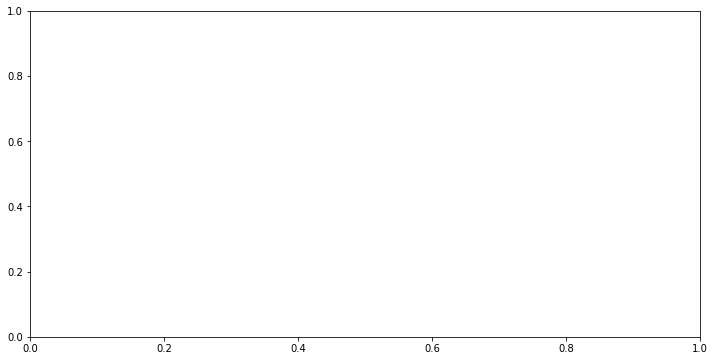

In [45]:
# # Compare RMSE squared values between models
# fig, caxis = plt.subplots(figsize=(12, 6))
# rmse_x = ['Linear Regression',
#           'BaselineOnly', 'SVD',
#           'Cosine Similarity',
#           'Baseline Only',
#           'KNN Baseline',
#           'KNN With Means',
#           'KNN WIth Z Score',
#           'KNN Basic',
#           'CoClustering',
#           'Normal Predictor']
# rmse_y = [lr_rmse, baseline_rmse, rmse_svd, CF_cosine, baselineOnly,
#           kNNBaseline, kNNWithMeans, kNNWithZScore, kNNBasic,
#           coClustering, normal]
# ax = sns.barplot(x=rmse_x, y=rmse_y, palette='plasma_r')
# plt.title('RMSE Values of Models', fontsize=14)
# plt.ylabel('RMSE')
# plt.xticks(rotation=90)
# for p in ax.patches:
#     ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(),
#             round(p.get_height(), 2),
#             fontsize=12, ha="center",
#             va='bottom')
# plt.show()

In [46]:
svd_params = dict(n_factors=100, n_epochs=20,
                  lr_all=0.005, reg_all=0.02)

lr_params = dict(fit_intercept=True, normalize=False,
                 copy_X=True, n_jobs=None)

baselineOnly_params = dict(verbose =True)

knnbaseline_params = dict(k=40, min_k=1, sim_options={},
                          bsl_options={}, verbose=True) 

knnwithmeans_params = dict(k=40, min_k=1,
                           sim_options={}, verbose=True)

knnwithzscore_params = dict(k=40, min_k=1,
                            sim_options={}, verbose=True)
                            
knnbasic_params = dict(k=40, min_k=1,
                       sim_options={}, verbose=True)

In [47]:
params = {'model type': 'SVD',
          'scaler': 'standard scaler',
          'params': str(svd_params),
          'model type': 'Linear Regression',
          'params': str(lr_params),
          'model type': 'Baseline Only',
          'params': str(baselineOnly_params),
          'model type': 'KNNBaseline',
          'params': str(knnbaseline_params),
          'model type': 'KNNWithMeans',
          'params': str(knnwithmeans_params),
          'model type': 'KNNWithZScore',
          'params': str(knnwithzscore_params),
          'model type': 'KNNBasic',
          'params': str(knnbasic_params),
          'stratify': True
          }

In [49]:
metrics = {'RMSE_SVD': rmse_svd,
           'RMSE_LR': lr_rmse,
           'RMSE_BaselineOnly': baseline_rmse,
           'RMSE_Cosine': CF_cosine,
           'KNNBaesline': kNNBaseline,
           'KNNWithMeans': kNNWithMeans,
           'KNNWithZScore': kNNWithZScore,
           'KNNBasic': kNNBasic,
           'CoClustering': coClustering,
           'Normal': normal
           }

NameError: ignored

In [52]:
experiment.log_dataset_hash(model_data)
experiment.log_parameters(params)
# experiment.log_metrics(metrics)

#End comet_ml Experiment
experiment.end()

COMET WARNING: Couldn't retrieve Google Colab notebook content
COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/mafikengz/recommendation-system/919dd2e03ae248bc8694e57d1a1ba1e3
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1vWE0wexP6Y6zp_2O4n6Wb_4n18gb1WhD
COMET INFO:   Parameters:
COMET INFO:     model type : KNNBasic
COMET INFO:     params     : {'k': 40, 'min_k': 1, 'sim_options': {}, 'verbose': True}
COMET INFO:     scaler     : standard scaler
COMET INFO:     stratify   : True
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO:     source_code         : 1

### Conclussion

We were able to solve the problem statement and managed to build a model that estimates the ratings of the movie as well as make movies recommendations for the streamlit app. Based on the RMSE metric calculated for all models, we decided that the SVD is the best and would be our final model. It was definitely interesting to see that the collaborative model outperformed the content-based model because of the cold-start problem. The cold-start problem, which describes the difficulty of making recommendations when the users or the items are new, remains a great challenge for collaborative filtering. We ultimately chose the SVD model based on the RMSE metric.

## Reference
- https://en.wikipedia.org/wiki/Recommender_system
- https://github.com/ngezler/Implementation-of-Movie-Recommender-System/blob/master/SY_1_Unsupervised_Notebook.ipynb